# Classificazione Binaria: `selfMade` con rulebased RIPPER

L'obiettivo è addestrare un classificatore basato su RIPPER (Repeated Incremental Pruning to Produce Error Reduction) per prevedere se un individuo è self-made o no.

- Viene utilizzata wittgenstein che è una libreria python che implementa ripper.
- Viene creato un modello ripper, impostando k=2(numero massimo di regole alternative in fase di pruning)
- Infine per visualizzare le regole, vengono estratte da model.ruleset_ e salvate su file.txt

In [5]:
import pandas as pd
import wittgenstein as lw
import sys
sys.path.append('../Scripts')
from utility import evaluate_and_save_model,plot_roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score,confusion_matrix

X_train = pd.read_csv("../data/splitted/X_train.csv")
X_test = pd.read_csv("../data/splitted/X_test.csv")
y_train = pd.read_csv("../data/splitted/y_train.csv").values.ravel()
y_test = pd.read_csv("../data/splitted/y_test.csv").values.ravel()

k=2
model = lw.RIPPER(k=k)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

evaluate_and_save_model(
    model,
    "ripper",
    y_train,
    y_pred_train,
    y_test,
    y_pred_test,
    "../results/classification_selfMade/rule_based/direct",
    "../models/rule_based_ripper.joblib"
)
rules_path = "../results/classification_selfMade/rule_based/direct/rules.txt"
with open(rules_path, "w") as f:
    f.write("=== RIPPER Rule Set ===\n\n")
    for i, rule in enumerate(model.ruleset_, 1):
        f.write(f"Rule {i}: {rule}\n")




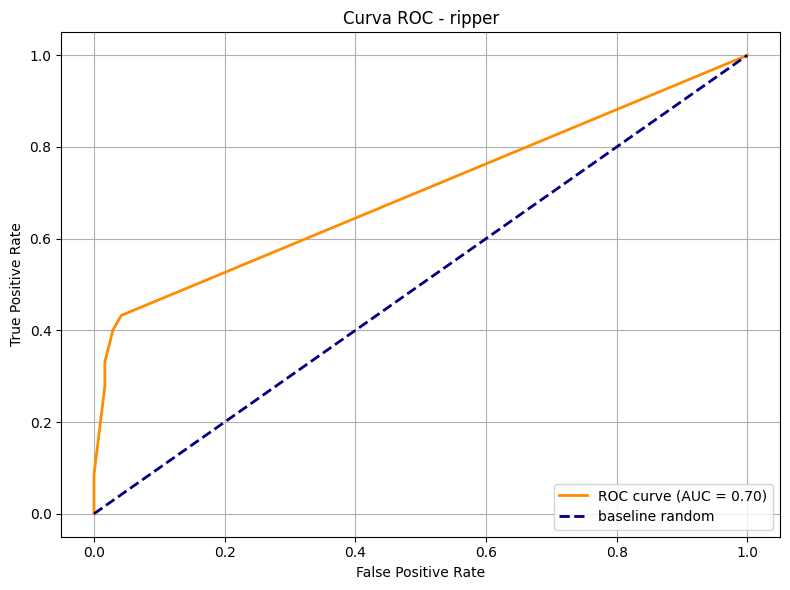

np.float64(0.6992259704251387)

In [6]:
plot_roc_curve(model, X_test, y_test, "ripper",f"../results/classification_selfMade/roc")
